In [1]:
%load_ext autoreload
%autoreload 2
import datetime
import numpy as np
import os
import pandas as pd
import sys

project_dir = os.sep.join([os.getcwd(), '..'])
#sys.path.append(os.sep.join([project_dir, 'src', 'processed']))
processed_data_dir = os.sep.join([project_dir, 'data', 'processed'])

%matplotlib inline

In [6]:
df = pd.read_feather(os.sep.join([processed_data_dir, 'obs_netflow.feather']))

In [7]:
display(df.head())

,DateTime,hour,weekday,month,public_holiday,school_holiday,temperature,wind_speed,humidity,sunshine,...,476,477,478,479,480,482,483,484,486,487
0,2016-04-01 07:00:00+00:00,9,4,4,0,0,2.7,1.4,46.0,60.0,...,0,0,0,0,0,0,0,0,0,0
1,2016-04-01 07:05:00+00:00,9,4,4,0,0,3.8,2.1,46.0,60.0,...,0,0,0,0,0,0,0,0,0,0
2,2016-04-01 07:10:00+00:00,9,4,4,0,0,3.8,2.1,46.0,60.0,...,0,0,0,0,0,0,0,0,0,0
3,2016-04-01 07:15:00+00:00,9,4,4,0,0,3.8,2.1,46.0,60.0,...,0,0,0,0,0,0,0,0,0,0
4,2016-04-01 07:20:00+00:00,9,4,4,0,0,3.8,2.1,46.0,60.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# No nan-values any more!
for v in df.columns:
    na = df[v].isna().sum()
    if na != 0:
        print(v, na)

In [11]:
cols = list(df.columns)
c_start = cols.index('157')
print(c_start)

19


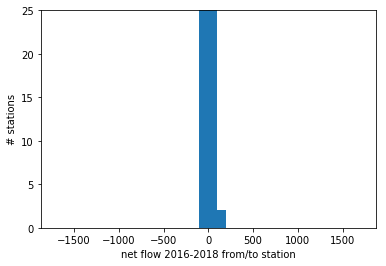

In [16]:
sum_over_time = df.iloc[:, c_start:].sum()
sum_over_time = sum_over_time[sum_over_time.ne(0)]
ax = sum_over_time.plot.hist(bins=range(-1700, 1701, 100))
ax.set_ylim(0, 25)
ax.set_xlabel('net flow 2016-2018 from/to station')
ax.set_ylabel('# stations')
fig = ax.get_figure()
fig.savefig('netflow.svg')

# Data exploration